In [4]:
import tensorflow as tf
from tensorflow import keras
# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [5]:
fashion_mnist = keras.datasets.fashion_mnist

In [24]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [20]:
# Obteniendo los valores unicos de los labels
np.unique( trains_labels )
class_names = [
  'T-shirt/top',
  'Trouser',
  'Pullover',
  'Dress',
  'Coat',
  'Sandal',
  'Shirt',
  'Sneaker',
  'Bag',
  'Ankle boot'
 ]

In [28]:
print( train_images.shape )
print( train_labels.shape )

(60000, 28, 28)
(60000,)


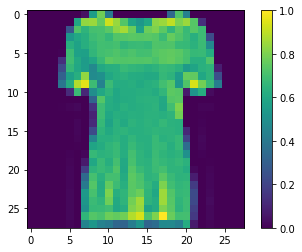

In [37]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [39]:
train_images = train_images/255.0
test_images = test_images/255.0

In [41]:
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)), #aplanando la imagen
  keras.layers.Dense(128, activation='relu'),#128 neuronas
  keras.layers.Dense(10, activation='softmax')#10 neuronas
])

In [45]:
# Mide que tan exacto  es el modelo durante
# el entrenamiento. Quiere minimizar esta funcion
# para dirigir el modelo en la direccion adecuada.
loss_function = 'sparse_categorical_crossentropy'
# Esto es como el modelo se actualia basado en el set de datos
# que ve y la funcion de perdida
optimizer = 'adam'
# se usan para monitorear los pasos de entrenamiento y de
# pruebas. El siguiente ejemplo usa accuracy(exactitud),
# la fraccion de la imagenes que son correctamente clasificadas
metrics = ['accuracy']
model.compile(
    optimizer=optimizer,
    loss=loss_function,
    metrics=metrics
)

In [46]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3026 - accuracy: 0.1008
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3002 - accuracy: 0.1163
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2911 - accuracy: 0.1554
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2714 - accuracy: 0.2003
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2412 - accuracy: 0.1997
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.2040 - accuracy: 0.2034
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.1623 - accuracy: 0.2146
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1188 - accuracy: 0.2123
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0753 - accuracy: 0.2177
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.033

In [47]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 2.0126 - accuracy: 0.2203


In [58]:
# haciendo prediciones
predictions = model.predict(test_images)

array([0.04787033, 0.06461804, 0.05268445, 0.05569154, 0.04785972,
       0.19319607, 0.05682348, 0.19922222, 0.10447313, 0.17756101],
      dtype=float32)

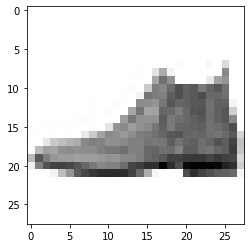

In [60]:
plt.imshow(test_images[0], cmap=plt.cm.binary)
predictions[0]

In [56]:
clase_num = np.argmax(predictions[0])
print(class_names[clase_num])

Sneaker


In [ ]:
https://www.tensorflow.org/tutorials/keras/classification?hl=es